### Análise do problema:


Os registros começam em 14 de junho de 2015 e continuam até 3 de setembro de 2018.

Que tipos de crimes são mais comuns?
Onde os diferentes tipos de crimes têm maior probabilidade de ocorrer?
A frequência dos crimes muda ao longo do dia? Semana? Ano?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/crimes-in-boston/offense_codes.csv
/kaggle/input/crimes-in-boston/crime.csv


In [2]:
crime = pd.read_csv('/kaggle/input/crimes-in-boston/crime.csv', encoding='latin')
oc = pd.read_csv('/kaggle/input/crimes-in-boston/offense_codes.csv', encoding='latin')

In [3]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
crime.shape

(319073, 17)

In [5]:
oc.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


In [6]:
oc.shape

(576, 2)

In [7]:
crime.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

## Limpeza e preparação dos dados

In [8]:
crime.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [9]:
crime['DISTRICT'].value_counts()

B2     49945
C11    42530
D4     41915
A1     35717
B3     35442
C6     23460
D14    20127
E13    17536
E18    17348
A7     13544
E5     13239
A15     6505
Name: DISTRICT, dtype: int64

In [10]:
crime['DISTRICT'] = crime['DISTRICT'].fillna(crime['DISTRICT'].mode().iloc[0])
crime.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                    0
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [11]:
# Os valores nulos de Shooting são por conta que não houve troca de tiro.

crime['SHOOTING'].value_counts()

Y    1019
Name: SHOOTING, dtype: int64

In [12]:
crime['SHOOTING'] = crime['SHOOTING'].fillna(value='N')

In [13]:
crime['UCR_PART'].value_counts()

Part Three    158553
Part Two       97569
Part One       61629
Other           1232
Name: UCR_PART, dtype: int64

In [14]:
crime['UCR_PART'] = crime['UCR_PART'].fillna(crime['UCR_PART'].mode().iloc[0])

In [15]:
crime.Lat.replace(-1, None, inplace=True)
crime.Long.replace(-1, None, inplace=True)

In [16]:
crime.drop(['INCIDENT_NUMBER', 'Location'], axis=1, inplace=True)

In [17]:
crime['STREET'].fillna('Not identified', inplace=True)

In [18]:
crime['OCCURRED_ON_DATE'] = pd.to_datetime(crime['OCCURRED_ON_DATE'])

In [19]:
crime.isnull().sum()

OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                   0
STREET                     0
Lat                    20044
Long                   20044
dtype: int64

## Análise Geral

<BarContainer object of 2 artists>

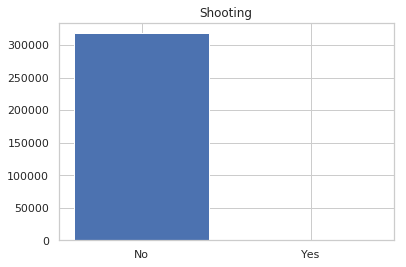

In [20]:
lista = crime['SHOOTING'].value_counts()
dict_shooting = {'No' : lista[0], 'Yes' : lista[1]}

names = dict_shooting.keys()
values = dict_shooting.values()

plt.title('Shooting')
plt.bar(names, values)

<BarContainer object of 5 artists>

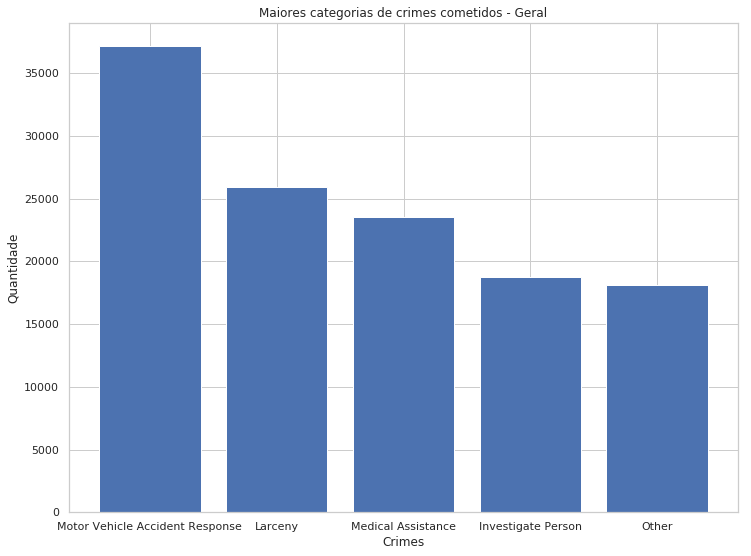

In [21]:
# Top 10 categoria de crimes cometidos
lista_offense_code_group = crime['OFFENSE_CODE_GROUP'].value_counts()
dict_offense_code_group = lista_offense_code_group[0:5].to_dict()

names_offense_code_group = dict_offense_code_group.keys()
values_offense_code_group = dict_offense_code_group.values()

plt.figure(figsize=[12,9])
plt.title('Maiores categorias de crimes cometidos - Geral')
plt.xlabel('Crimes')
plt.ylabel('Quantidade')
plt.bar(names_offense_code_group, values_offense_code_group)

UCR Part One que incluem os crimes mais sérios.

<BarContainer object of 5 artists>

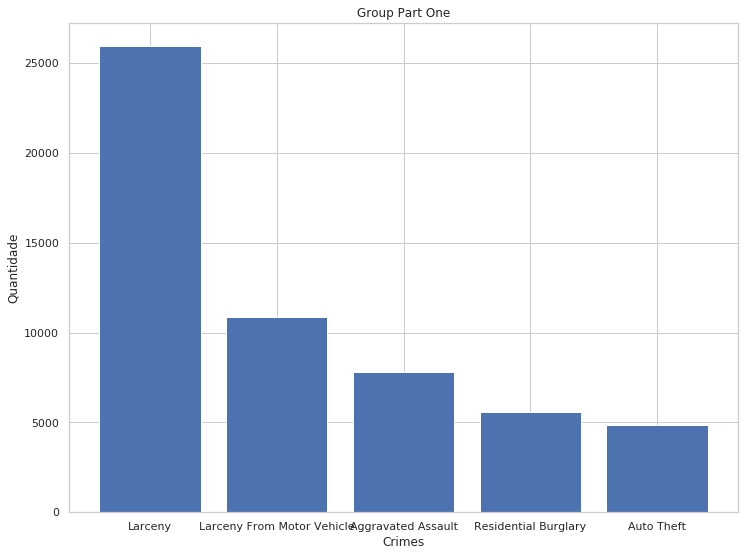

In [22]:
crime_part_one = crime.loc[crime['UCR_PART'] == 'Part One']

lista_offense_group_one = crime_part_one['OFFENSE_CODE_GROUP'].value_counts()
dict_offense_group_one = lista_offense_group_one[0:5].to_dict()

names_offense_group_one = dict_offense_group_one.keys()
values_offense_group_one = dict_offense_group_one.values()

plt.figure(figsize=[12,9])
plt.title('Group Part One')
plt.xlabel('Crimes')
plt.ylabel('Quantidade')
plt.bar(names_offense_group_one, values_offense_group_one)

<BarContainer object of 12 artists>

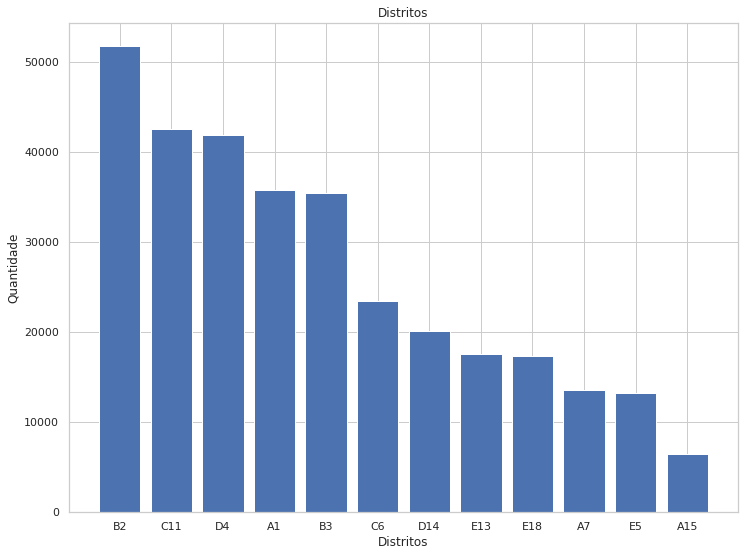

In [23]:
# Distritos
lista_district = crime['DISTRICT'].value_counts()
dict_district = lista_district.to_dict()

names_district = dict_district.keys()
values_district = dict_district.values()

plt.figure(figsize=[12,9])
plt.title('Distritos')
plt.xlabel('Distritos')
plt.ylabel('Quantidade')
plt.bar(names_district, values_district)

In [24]:
grouped = crime[['MONTH']].groupby(crime['OFFENSE_CODE_GROUP'])

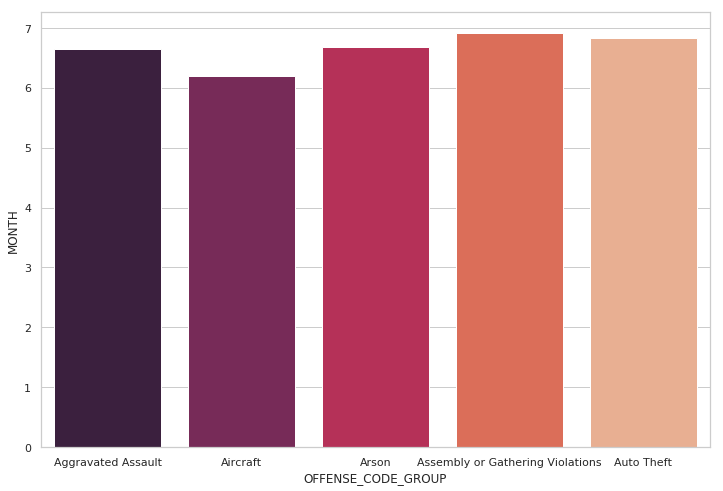

In [25]:
grouped_month = grouped.mean()
grouped_month = grouped_month[:5]
plt.figure(figsize=[12,8])
sns.barplot(x=grouped_month.index, y=grouped_month['MONTH'], palette="rocket")

Text(0.5, 6.79999999999999, 'Hora')

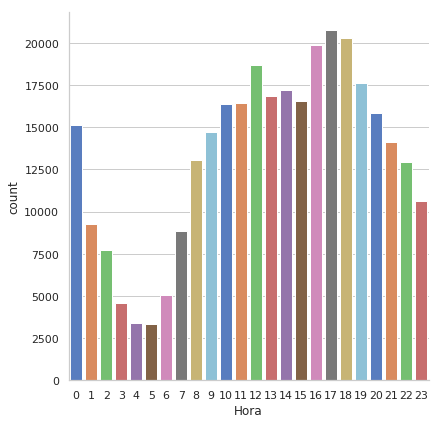

In [26]:
# Gráfico com a hora de ocorrência dos crimes
sns.catplot(x="HOUR", kind="count", height=6, palette="muted", data=crime)
plt.xlabel("Hora")

Text(0.5, 6.79999999999999, 'Dias')

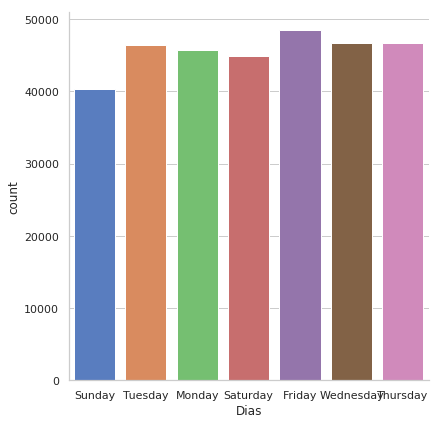

In [27]:
# Gráfico com os dias da semana com ocorrência dos crimes
sns.catplot(x="DAY_OF_WEEK", kind="count", height=6, palette="muted", data=crime)
plt.xlabel("Dias")

Text(0.5, 6.79999999999999, 'Mês')

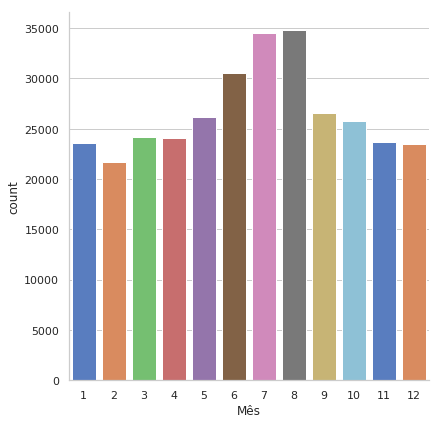

In [28]:
# Gráfico com o mês de ocorrência dos crimes
sns.catplot(x="MONTH", kind="count", height=6, palette="muted", data=crime)
plt.xlabel("Mês")

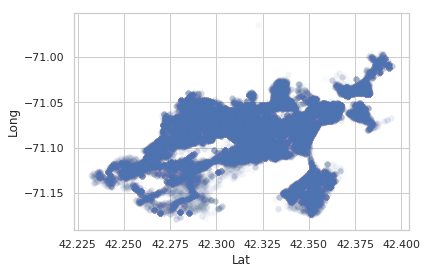

In [29]:
# Scatterplot geral
sns.scatterplot(x='Lat',
               y='Long',
                alpha=0.01,
               data=crime)

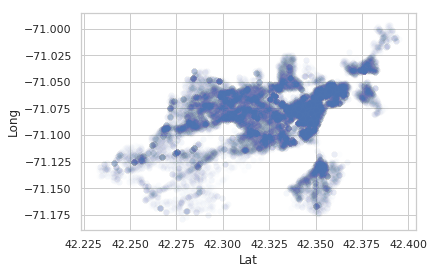

In [30]:
# Scatterplot UCR Part One
sns.scatterplot(x='Lat',
               y='Long',
                alpha=0.01,
               data=crime_part_one)

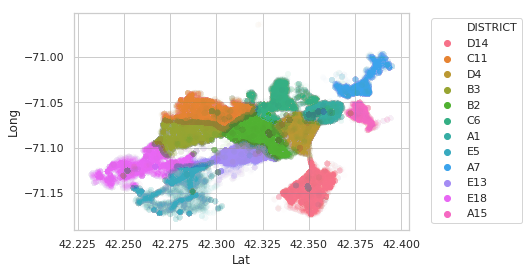

In [31]:
# Scatterplot relacionado com o distrito
sns.scatterplot(x='Lat',
               y='Long',
               hue='DISTRICT',
               alpha=0.01,
               data=crime)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)